In [ ]:
import os
PATH = os.getenv("HOME")
os.chdir(f"{PATH}/watttime-python-client-aer-algo")

import pandas as pd
import data.s3 as s3u
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

username = os.getenv("WATTTIME_USER")
password = os.getenv("WATTTIME_PASSWORD")

s3 = s3u.s3_utils()

results = [_ for _ in s3.list_objects(prefix="results/analysis_requery_202412") if "v3" in _]
order = ["ideal", "0", "5", "15", "30", "60", "90", "120", "180", "240", "baseline"]

In [32]:
results[0]

'results/analysis_requery_20241212_v3_ERCOT_AUSTIN.csv'

In [54]:
dfs = {}
for result in results[:2]:
    dfs[result] = s3.load_csvdataframe(result)

['results/analysis_requery_20241212_v3_ERCOT_AUSTIN.csv', 'results/analysis_requery_20241212_v3_ERCOT_EASTTX.csv', 'results/analysis_requery_20241212_v3_FPL.csv', 'results/analysis_requery_20241212_v3_ISONE_VT.csv', 'results/analysis_requery_20241212_v3_LDWP.csv', 'results/analysis_requery_20241212_v3_MISO_INDIANAPOLIS.csv', 'results/analysis_requery_20241212_v3_NYISO_NYC.csv', 'results/analysis_requery_20241212_v3_PACE.csv', 'results/analysis_requery_20241212_v3_PJM_CHICAGO.csv', 'results/analysis_requery_20241212_v3_PJM_DC.csv', 'results/analysis_requery_20241212_v3_PNM.csv', 'results/analysis_requery_20241212_v3_SOCO.csv', 'results/analysis_requery_20241212_v3_SPP_KANSAS.csv', 'results/analysis_requery_20241212_v3_SPP_SIOUX.csv', 'results/analysis_requery_20241212_v3_SPP_TX.csv', 'results/analysis_requery_20241212_v3_WALC.csv']


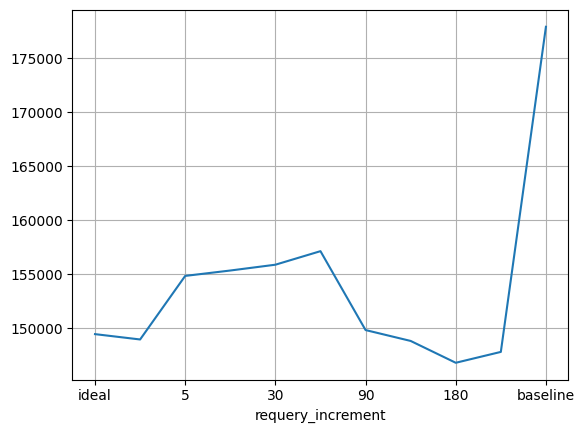

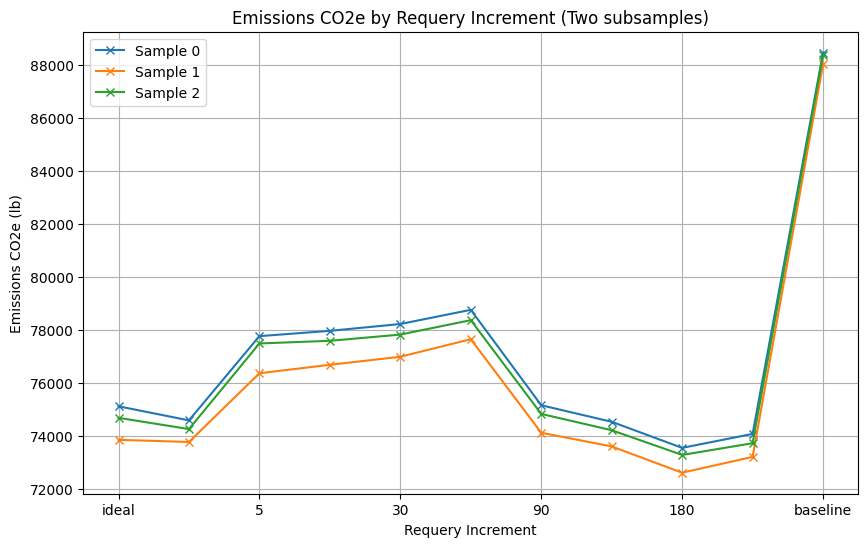

In [ ]:
result = results[0]
df = dfs[result]
print(result)
df.groupby("requery_increment")["emissions_co2e_lb"].sum().loc[order].plot(grid=True)
plt.show()

n_subsamples = 3

plt.figure(figsize=(10, 6))
for i in range(n_subsamples):
    subsample = pd.Series(df["uuid"].unique()).sample(frac=0.5)

    df_subsample = (
        df[df["uuid"].isin(subsample)]
        .groupby("requery_increment")["emissions_co2e_lb"].sum()
        .loc[order]
    )
    df_subsample.plot(label=f"Sample {i}", grid=True, marker="x")

plt.title("Emissions CO2e by Requery Increment (Two subsamples)")
plt.xlabel("Requery Increment")
plt.ylabel("Emissions CO2e (lb)")
plt.legend()
plt.show()

In [ ]:
df = dfs[results[1]]
df.groupby("requery_increment")["emissions_co2e_lb"].sum().loc[order].plot(grid=True)
plt.show()

n_subsamples = 3

plt.figure(figsize=(10, 6))
for i in range(n_subsamples):
    subsample = pd.Series(df["uuid"].unique()).sample(frac=0.5)

    df_subsample = (
        df[df["uuid"].isin(subsample)]
        .groupby("requery_increment")["emissions_co2e_lb"].sum()
        .loc[order]
    )
    df_subsample.plot(label=f"Sample {i}", grid=True, marker="x")

plt.title("Emissions CO2e by Requery Increment (Two subsamples)")
plt.xlabel("Requery Increment")
plt.ylabel("Emissions CO2e (lb)")
plt.legend()
plt.show()